# Problem Statement
### 1.	Backpropagation algorithm in the classical feed-forward artificial neural network. :- Wheat Seed Data set 


Libraies Required

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

### Data Set : Wheat Seed DataSet
#### Data Header >  | Area  | Perimeter | Compactness | Kernel.Length | Kernel.Width | Asymmetry.Coeff | Kernel.Groove | Type |

Data Preprocessing

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'Compactness'}>],
       [<Axes: title={'center': 'Kernel.Length'}>,
        <Axes: title={'center': 'Kernel.Width'}>,
        <Axes: title={'center': 'Asymmetry.Coeff'}>],
       [<Axes: title={'center': 'Kernel.Groove'}>,
        <Axes: title={'center': 'Type'}>, <Axes: >]], dtype=object)

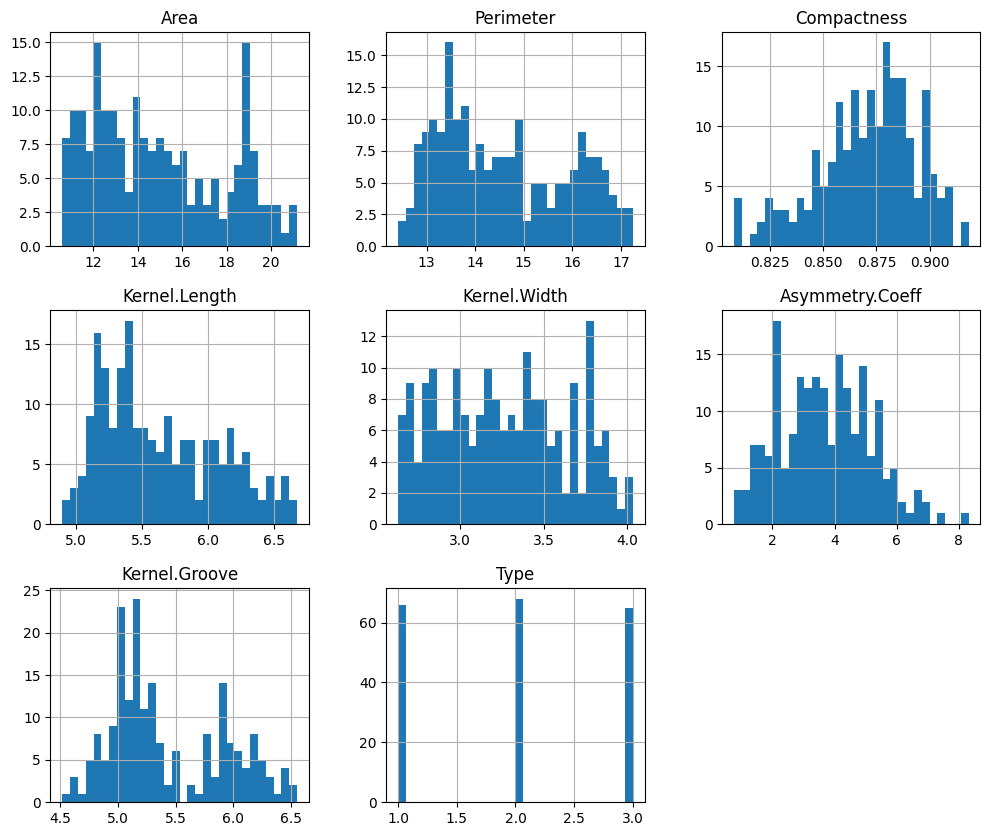

In [5]:
Dataset = "../Data/Wheat-seed/seeds.csv"

df = pd.read_csv(Dataset)
df.head()
df.hist(figsize=(12,10),bins=30)

In [3]:

# Variable Separation 
X = df.iloc[:, 0:7].values
y = df.iloc[:, 7].values

# Train test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Adjust labels to start from 0
y_train = y_train - 1
y_test = y_test - 1


Neural Network Design 

In [4]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(3, activation='softmax')  # Target classes are 3 hence 
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Training Phase :

In [5]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
4/4 [==============================] - 2s 50ms/step - loss: 1.1285 - accuracy: 0.2677 - val_loss: 0.9803 - val_accuracy: 0.7500
Epoch 2/50
4/4 [==============================] - 0s 9ms/step - loss: 1.0075 - accuracy: 0.5827 - val_loss: 0.8742 - val_accuracy: 0.7812
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 0.9056 - accuracy: 0.6378 - val_loss: 0.7823 - val_accuracy: 0.8125
Epoch 4/50
4/4 [==============================] - 0s 9ms/step - loss: 0.8175 - accuracy: 0.6850 - val_loss: 0.7039 - val_accuracy: 0.8125
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 0.7435 - accuracy: 0.7165 - val_loss: 0.6366 - val_accuracy: 0.8438
Epoch 6/50
4/4 [==============================] - 0s 9ms/step - loss: 0.6794 - accuracy: 0.7559 - val_loss: 0.5792 - val_accuracy: 0.8438
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 0.6249 - accuracy: 0.7874 - val_loss: 0.5305 - val_accuracy: 0.8438
Epoch 8/50
4/4 [===============

Metrics 

2/2 [==============================] - 0s 6ms/step - loss: 0.3060 - accuracy: 0.8750
Test loss: 0.30603542923927307
Test accuracy: 0.875
2/2 [==============================] - 0s 3ms/step


<Axes: >

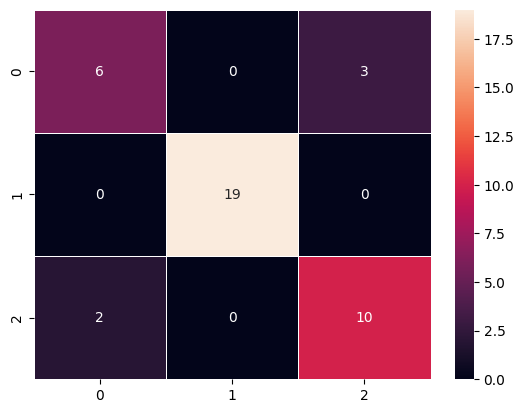

In [6]:
# Evaluate the performance of the trained model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Predict on the test set
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_predicted_labels)
sns.heatmap(cm, annot=True, fmt="d",  linewidths=.5)

